# APS 2 - Aplicação de Método de Diferenças Finitas

Bibliotecas Utilizadas

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

Dados retirados do enunciado

In [2]:
t = 550 #6                                        # tempo [s]
L = 0.3                                      # compriemnto [m]
delta_x = 0.01*2                               # distancia entre os pontos no comprimento 
#delta_t = 0.001
ro = 2700                                    # densidade [kg/m^3]
k = 180                                      # condutividade termica [W/mK]
cp = 896                                     # calor específico [J/kgK]
alpha = k / (cp * ro)                        # alpha [cm^2/s]
T_base = 100                                 # temperatura na extremidade x = 0
T_L = 25                                     # temperatura na extremidade x = L
T_inf = 50                                   # temperatura ambiente
h = 50                                       # coef. de transferencia de calor por convecção [W/m^2K]
D = 5e-3                                     # diametro da aleta[m]
r = D/2                                      # raio da aleta [m]
P = 2 * pi * r                               # perimetro
Atr = pi * r**2                              # área secção trasnversal 
#passos_tempo = int(t/delta_t)+1
passos_comprimento = int((L / delta_x))      # quantas vezes precisamos calcular o for do comprimento
tol = 1e-10                                  # tolerancia

In [3]:
const = (h * P) /  (k * Atr)                                          # h * P / k * Atr
cond = ((delta_x **2)/(alpha*(((h*P*(delta_x**2))/(k*Atr)) + 2))) * 0.9   # condição de estabilidade
delta_t = cond

passos_tempo = int(t/delta_t)+1

print(cond)
print(passos_tempo)

2.3162553191489357
238


Condições de Controno

In [4]:
nn = int(L/delta_x)+1                        # número de nós
T_matriz = np.zeros((passos_tempo,nn))       # preenchendo matriz de temperatura
T_matriz[0:, 1:nn-1] = 50.0                   # condição inicial nos nós internos (em float)
T_matriz[:,0] = T_base                       # temperatura fixa na base
T_matriz[:,nn-1] = T_L                       # temperatura fixa na extremidade

In [5]:
print(f"alpha = {alpha}")
print(nn)
print(f"passo tempo = {passos_tempo}")
print(f"passo comp = {passos_comprimento}")

alpha = 7.440476190476191e-05
16
passo tempo = 238
passo comp = 15


1. [4,0 pontos] Aplique os conceitos do método de diferenças finitas na equação diferencial do problema para definir uma equação de diferença algébrica associada aos nós da aleta. Considere para a segunda derivada da temperatura no espaço uma equação de diferença finita centrada e para a primeira derivada no tempo da temperatura uma equação de diferença progressiva. Apresente o desenvolvimento das equações.

<div justify-content="center">$\frac{d^2T}{dx^2} - \frac{hP}{ \kappa A_{tr}}(T - T_\infty) = \frac{1}{\alpha}.\frac{dT}{dt}$</div>

$\frac{d^2T}{dx^2}   \approx \frac{T_{i+1} - 2T_i + T_{i-1}}{ \Delta x^2}$

$\frac{dT}{dt} \approx  \frac{T_i^{l+1}-T_i^l}{\Delta t}$

$\frac{T_{i+1} - 2T_i + T_{i-1}}{ \Delta x^2} - \frac{hP}{ \kappa A_{tr}}(T - T_\infty) = \frac{1}{\alpha}.\frac{T_i^{l+1}-T_i^l}{\Delta t}$

$T_i^{l+1} = [\frac{T_{i+1} - 2T_i + T_{i-1}}{ \Delta x^2} - \frac{hP}{ \kappa A_{tr}}(T - T_\infty)] .[\alpha . \Delta t]+T_i^l$

2. [4,0 pontos] Apresente um gráfico (𝑻𝒆𝒎𝒑𝒆𝒓𝒂𝒕𝒖𝒓𝒂 × 𝒑𝒐𝒔𝒊çã𝐨) com o resultado numérico após obter o regime permanente. Use uma tolerância de 𝑡𝑜𝑙 = 1 ∙ 10ିଵ଴. Considere que a aleta, de comprimento 𝐿 = 300𝑚𝑚 , densidade de 2700 𝑘𝑔/𝑚³, condutividade térmica de 180 𝑊/(𝑚𝐾) e calor específico 896 𝐽/(𝑘𝑔𝐾) , tem a temperatura especificada na extremidade de 𝑇(𝐿) = 25℃. A aleta está em contato com uma base a 𝑇௕ = 100℃ em um ambiente a 𝑇ஶ= 50℃ e ℎ = 50𝑊/𝑚ଶ𝐾.

In [6]:
print(T_matriz)

[[100.  50.  50. ...  50.  50.  25.]
 [100.  50.  50. ...  50.  50.  25.]
 [100.  50.  50. ...  50.  50.  25.]
 ...
 [100.  50.  50. ...  50.  50.  25.]
 [100.  50.  50. ...  50.  50.  25.]
 [100.  50.  50. ...  50.  50.  25.]]


In [10]:
if(delta_t <= cond):
#Loop que depende do tempo total / delta_t
    for l in np.arange(0, passos_tempo, 1):
        
        #Loop para só alterar as temperaturas do meio
        for i in np.arange(1, passos_comprimento, 1):
            #conta = ((((T_matriz[l][i+1] - (2 * T_matriz[l][i]) + T_matriz[l][i-1])/(delta_x**2)) - 
            #(const * (T_matriz[l][i] - T_inf))) * (alpha*delta_t) + T_matriz[l][i])
            
            x = T_matriz[l][i] + (alpha*delta_t*((T_matriz[l][i+1] - 2*T_matriz[l][i]+ T_matriz[l][i-1])/delta_x**2))
            y = alpha*delta_t*(((h*P)*(T_matriz[l][i] - T_inf))/(k*Atr))
            
            print(l, i)
            print(f"conta = {x-y}")
            T_matriz[l+1][i] = x-y
            
            
            #print(f"conta = {conta}")
            #T_matriz[l+1][i] = conta
            #print(f"conta={conta}")

        #print(T_matriz[l+1][:])

        erro = np.amax(abs((T_matriz[l+1][nn-1]-T_matriz[l][nn-1])/T_matriz[l+1][nn-1]))
        if tol >=erro:
            print(f'Convergiu! {(l + 1)*delta_t}s')
            break
else:
    print("Erro! Valor de dt muito elevado")

T_matriz

0 1
conta = 71.54255319148936
0 2
conta = 50.0
0 3
conta = 50.0
0 4
conta = 50.0
0 5
conta = 50.0
0 6
conta = 50.0
0 7
conta = 50.0
0 8
conta = 50.0
0 9
conta = 50.0
0 10
conta = 50.0
0 11
conta = 50.0
0 12
conta = 50.0
0 13
conta = 50.0
0 14
conta = 39.22872340425532
Convergiu! 2.3162553191489357s


array([[100.        ,  50.        ,  50.        , ...,  50.        ,
         50.        ,  25.        ],
       [100.        ,  71.54255319,  50.        , ...,  50.        ,
         39.2287234 ,  25.        ],
       [100.        ,  73.69680851,  59.28163196, ...,  45.35918402,
         38.15159574,  25.        ],
       ...,
       [100.        ,  86.97127741,  77.22889074, ...,  36.9339926 ,
         31.77691128,  25.        ],
       [100.        ,  86.97127748,  77.22889086, ...,  36.93399272,
         31.77691134,  25.        ],
       [100.        ,  86.97127753,  77.22889098, ...,  36.93399283,
         31.7769114 ,  25.        ]])

Plotando Gráfico

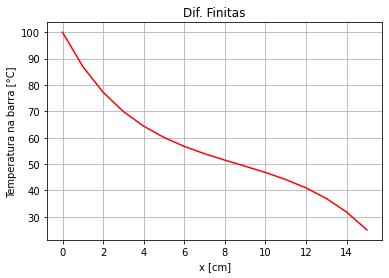

In [14]:
lista_posicao = []
# Fazendo o valor dos pontos em cm
for x in np.arange(0, nn, 1):
    lista_posicao.append(x)

#Lista para pegar as temperaturas no temo 3, 6 e 9
ultimo = len(T_matriz)

#Valores de temperatura após 3s 
plt.plot(lista_posicao, T_matriz[ultimo - 1], color="red")

plt.title("Dif. Finitas")
plt.xlabel("x [cm]")
plt.ylabel("Temperatura na barra [°C]")
plt.grid()
#plt.legend()
plt.show()

3. [2,0 pontos] Apresente um gráfico (𝑻𝒆𝒎𝒑𝒆𝒓𝒂𝒕𝒖𝒓𝒂 × 𝒑𝒐𝒔𝒊çã𝒐) com o resultado analítico. Compare o resultado do item 2 com o obtido para o comportamento analítico da temperatura na aleta. Use as mesmas condições definidas no item 2. 

Caso C - Temperatura especificada

$\frac{\theta}{\theta_b} = \frac{\frac{\theta_L}{\theta_b} senh(mx) + senh [m(L-x)]}{senh (mL)}$


$\theta  \equiv T-T_ \infty $


$ \theta_b = T_b - T_ \infty $


$ m^2  \equiv  \frac{hP}{kA_{tr}} $

In [43]:
m = sqrt((h * P) / (k * Atr))
theta_l = T_L - T_inf
theta_b = T_base - T_inf
lista_T = []
c = theta_l / theta_b



for x in np.arange(0, passos_comprimento + 1, 1):
    num = (c * sinh(m * x)) + sinh(m*(L - x))
    den = sinh(m*L)
    
    
    #theta = T - T_inf
    T = ((num/den)*theta_b) + T_inf
    print(T)
    lista_T.append(T)

#print(sinh(m * L))
#print(sinh(m*(L - L)))

#print(lista_T)

-0.5
100.0
-870237.5346796616
-2592642613739.2324
-7.723649316865883e+18
-2.3009248730481842e+25
-6.854603380102863e+31
-2.0420304916897347e+38
-6.083340344818175e+44
-1.8122662664194367e+51
-5.398857920549325e+57
-1.6083545440519594e+64
-4.79139176737102e+70
-1.4273864648396292e+77
-4.2522762047597857e+83
-1.2667804667461478e+90
-3.773820593152641e+96


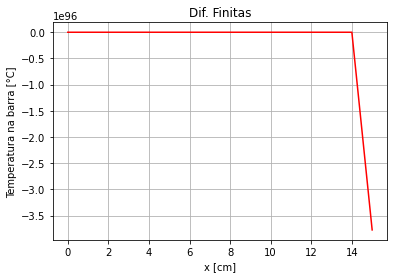

In [35]:
#Valores de temperatura após 3s 
plt.plot(lista_posicao, lista_T, color="red")

plt.title("Dif. Finitas")
plt.xlabel("x [cm]")
plt.ylabel("Temperatura na barra [°C]")
plt.grid()
#plt.legend()
plt.show()